In [15]:
import polars as pl
from attack_predictor_libs.dataset.guide_dataset import GuideDataset

In [6]:
dataset = GuideDataset()

In [95]:
dataset.data.shape

(5889339, 50)

In [35]:
df = dataset.data
df = df.with_columns((pl.col("dataset_type") + "_" + pl.col("OrgId").cast(str) + "_" + pl.col("IncidentId").cast(str)).alias("unique_id"))
df = df.drop_nulls("IncidentGrade")

In [98]:
df.unique(pl.col("unique_id"))

Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,dataset_type,is_preparation_alert,is_intrusion_alert,is_compromise_alert,alert_bit_value,unique_id
i64,i64,i64,i64,datetime[μs],i64,i64,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,str,str,i64,i64,str,str,str,i64,i64,i64,str,bool,bool,bool,i64,str
652835033658,485,61033,989683,2024-06-12 14:32:08,0,0,"""InitialAccess""","""T1078;T1078.004""","""FalsePositive""",null,null,"""Ip""","""Related""",98799,138268,115686,160396,441377,673934,425863,453297,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,null,0,275,2640,"""train""",true,true,false,3,"""train_485_61033"""
1254130453574,2585,240956,660405,2024-06-14 13:45:27,11,9,"""InitialAccess""","""T1566""","""TruePositive""",null,null,"""User""","""Impacted""",98799,138268,360606,160396,236389,252748,259624,221063,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,null,242,1445,10630,"""test""",true,false,false,1,"""test_2585_240956"""
317827582814,170,163290,953690,2024-06-13 09:06:30,0,0,"""InitialAccess""","""T1078;T1078.004""","""FalsePositive""",null,null,"""Ip""","""Related""",98799,138268,337607,160396,441377,673934,425863,453297,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,null,6,19,36,"""test""",true,true,false,3,"""test_170_163290"""
197568497150,760,29092,1005505,2024-06-13 21:07:37,0,0,"""InitialAccess""","""T1078;T1078.004""","""FalsePositive""",null,null,"""CloudLogonSession""","""Related""",98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,null,242,1445,10630,"""test""",true,true,false,3,"""test_760_29092"""
77309412050,504,384338,1005906,2024-06-11 06:17:25,0,0,"""InitialAccess""","""T1078;T1078.004""","""FalsePositive""",null,null,"""Ip""","""Related""",98799,138268,291632,160396,441377,673934,425863,453297,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,null,13,37,686,"""train""",true,true,false,3,"""train_504_384338"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
893353201586,194,14515,1717198,2024-06-15 13:41:26,1260,5450,"""Discovery""","""T1046""","""BenignPositive""",null,null,"""Ip""","""Related""",98799,138268,4178,160396,441377,673934,425863,453297,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,null,242,1445,10630,"""train""",false,true,false,2,"""train_194_14515"""
798863921176,108,87326,100141,2024-06-14 19:21:08,1,1,"""InitialAccess""","""T1566.002""","""BenignPositive""",null,null,"""Url""","""Related""",98799,138268,360606,20822,441377,673934,425863,453297,153085,529644,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,null,null,"""Malicious""",242,1445,10630,"""train""",true,false,false,1,"""train_108_87326"""
687194769342,39,115426,97109,2024-06-11 18:31:49,6,5,"""InitialAccess""","""T1566""","""BenignPositive""",null,null,"""MailMessage""","""Related""",98799,138268,360606,160396,441377,8084,425863,453297,153085,98942,null,1631,635,860,2251,3421,881,null,289573,117668,3586,null,null,5,66,"""Inbound""",null,"""NoThreatsFound""",242,1445,10630,"""train""",true,false,false,1,"""train_39_115426"""


In [46]:
pivot_df = df.pivot(
    index = "unique_id",
    values = "IncidentGrade",
    on = "IncidentGrade",
    aggregate_function = "count"
).fill_null(0)

/tmp/ipykernel_580552/2464090380.py:1: DeprecationWarning: `aggregate_function='count'` input for `pivot` is deprecated. Please use `aggregate_function='len'`.
  pivot_df = df.pivot(


In [97]:
pivot_df.shape

(355584, 8)

In [87]:
pivot_df.head()

unique_id,FalsePositive,BenignPositive,TruePositive,total,FalsePositiveRate,TruePositiveRate,BenignPositiveRate
str,u32,u32,u32,i32,f64,f64,f64
"""train_809_58352""",17,0,0,17,1.0,0.0,0.0
"""train_11_417400""",4,0,0,4,1.0,0.0,0.0
"""train_2119_6622""",0,23,0,23,0.0,0.0,1.0
"""train_261_110412""",0,10,0,10,0.0,0.0,1.0
"""train_51_84683""",0,5,0,5,0.0,0.0,1.0


In [48]:
pivot_df.select("")

unique_id,FalsePositive,BenignPositive,TruePositive
str,u32,u32,u32
"""train_809_58352""",17,0,0
"""train_11_417400""",4,0,0
"""train_2119_6622""",0,23,0
"""train_261_110412""",0,10,0
"""train_51_84683""",0,5,0


In [54]:
pivot_df = pivot_df.with_columns(
    (pl.col("FalsePositive").cast(pl.Int32) + pl.col("TruePositive").cast(pl.Int32) + pl.col("BenignPositive").cast(pl.Int32)).alias("total"),
).with_columns(
    (pl.col("FalsePositive").cast(pl.Int32)/ pl.col("total")).alias("FalsePositiveRate"),
    (pl.col("TruePositive").cast(pl.Int32)/ pl.col("total")).alias("TruePositiveRate"),
    (pl.col("BenignPositive").cast(pl.Int32)/ pl.col("total")).alias("BenignPositiveRate"),
)

In [68]:
sorted_pivot = pivot_df.sort("FalsePositiveRate", descending = True)

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from matplotlib.ticker import FuncFormatter 

In [94]:
pivot_df.shape

(355584, 8)

<Axes: ylabel='Count'>

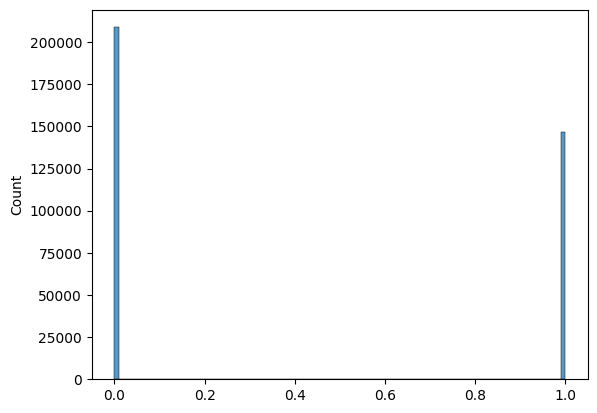

In [90]:
sns.histplot(sorted_pivot.get_column("FalsePositiveRate"), bins = 100)

<Axes: ylabel='Count'>

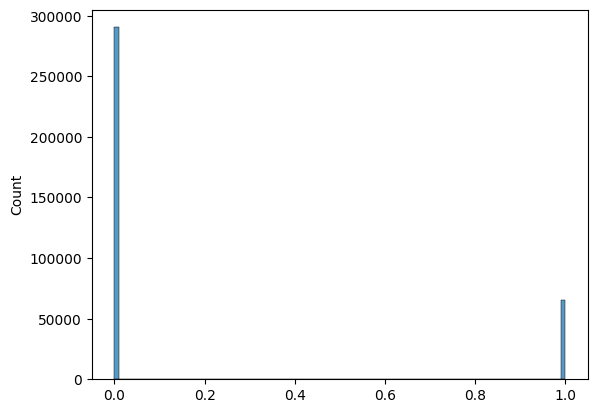

In [91]:
sns.histplot(sorted_pivot.get_column("TruePositiveRate"), bins = 100)

In [99]:
sorted_pivot.filter(pl.col("TruePositiveRate") >0.99).shape

(65148, 8)

<Axes: ylabel='Count'>

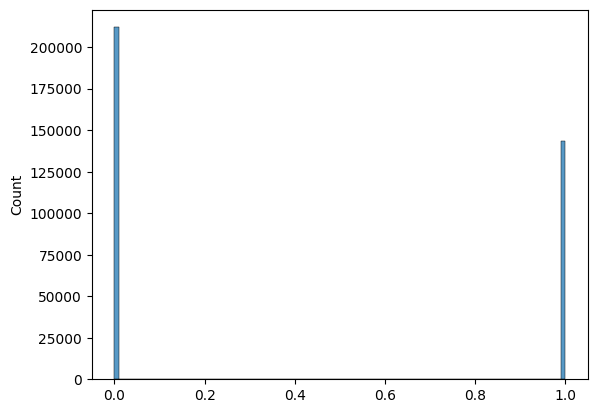

In [92]:
sns.histplot(sorted_pivot.get_column("BenignPositiveRate"), bins = 100)

<BarContainer object of 10000 artists>

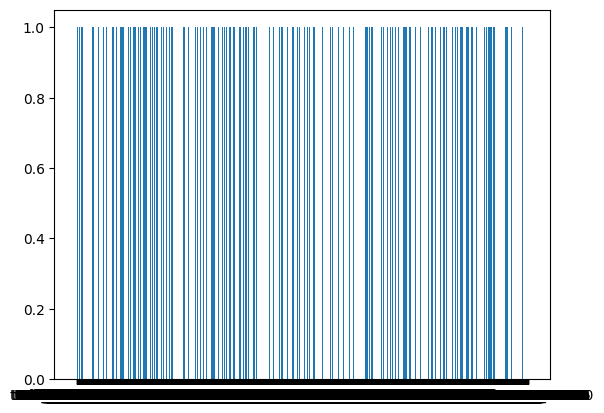

In [81]:

# .to_pandas().plot(kind = "bar", x = "unique_id", y = ["FalsePositiveRate", "TruePositiveRate", "BenignPositiveRate"], stacked = True)
# ヒストグラム用のバケット
from re import A


bins = 20

# ヒストグラムを計算
hist, bin_edges = np.histogram(sorted_pivot.get_columns(""), bins=bins)

# 棒グラフを作成
plt.bar(bin_edges[:-1], hist, width=(bin_edges[1] - bin_edges[0]))
plt.show()A

['train_809_58352',
 'train_11_417400',
 'train_4_2640',
 'train_206_251904',
 'train_4_2624']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 例: データフレームの列
unique_ids = ["ID1", "ID2", "ID3"]  # X軸ラベル
false_positive = [1.0, 1.0, 0.0]
true_positive = [0.0, 0.0, 0.0]
benign_positive = [0.0, 0.0, 1.0]

# データを積み上げ棒グラフとしてプロット
width = 0.6  # 棒の幅
x = np.arange(len(unique_ids))

plt.bar(x, false_positive, width, label="FalsePositiveRate", color="red")
plt.bar(x, true_positive, width, bottom=false_positive, label="TruePositiveRate", color="green")
plt.bar(x, benign_positive, width, bottom=np.array(false_positive)+np.array(true_positive), label="BenignPositiveRate", color="blue")

plt.xticks(x, unique_ids)
plt.xlabel("Unique ID")
plt.ylabel("Rate")
plt.title("Stacked Bar Chart for Incident Rates")
plt.legend()
plt.show()

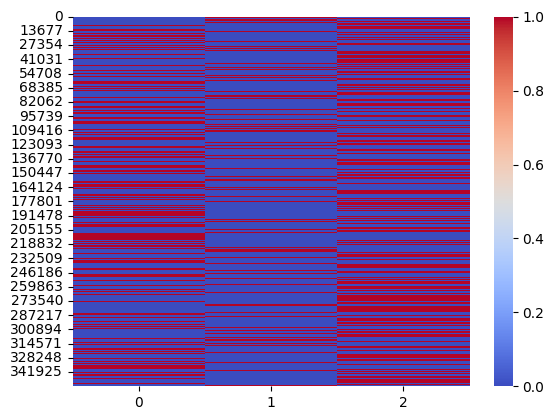

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# データフレームを整形
# heatmap_data = df.pivot(index="unique_id", columns="IncidentGrade", values="FalsePositiveRate")

# ヒートマップ描画
sns.heatmap(pivot_df.select(["FalsePositiveRate", "TruePositiveRate", "BenignPositiveRate"]), cmap="coolwarm")
plt.show()

In [23]:
df.select(pl.col("unique_id"), pl.col("IncidentGrade"))

unique_id,IncidentGrade
str,str
"""train_809_58352""","""FalsePositive"""
"""train_11_417400""","""FalsePositive"""
"""train_2119_6622""","""BenignPositive"""
"""train_261_110412""","""BenignPositive"""
"""train_51_84683""","""BenignPositive"""
…,…
"""test_358_121968""","""FalsePositive"""
"""test_262_3017""","""BenignPositive"""
"""test_47_3653""","""FalsePositive"""


In [ ]:
df.filtera